In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import math
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#checking for missing values(NAN) in the data
data.isna().any().any()

False

No missing values in the data

### Exploratory Data Analysis (EDA)

#### Categorical Features

In [6]:
# checking all the unique values in categorical featues
for column in data.select_dtypes('object'):
    print('\ncolumn: {} \nunique values: {} '.format(column , data[column].unique()))
    


column: customerID 
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

column: gender 
unique values: ['Female' 'Male'] 

column: Partner 
unique values: ['Yes' 'No'] 

column: Dependents 
unique values: ['No' 'Yes'] 

column: PhoneService 
unique values: ['No' 'Yes'] 

column: MultipleLines 
unique values: ['No phone service' 'No' 'Yes'] 

column: InternetService 
unique values: ['DSL' 'Fiber optic' 'No'] 

column: OnlineSecurity 
unique values: ['No' 'Yes' 'No internet service'] 

column: OnlineBackup 
unique values: ['Yes' 'No' 'No internet service'] 

column: DeviceProtection 
unique values: ['No' 'Yes' 'No internet service'] 

column: TechSupport 
unique values: ['No' 'Yes' 'No internet service'] 

column: StreamingTV 
unique values: ['No' 'Yes' 'No internet service'] 

column: StreamingMovies 
unique values: ['No' 'Yes' 'No internet service'] 

column: Contract 
unique values: ['Month-to-month' 'One year' 'Two year'] 

column: P

In [7]:
#rename some of the values from paymentmethod feature to facilitate readability during plotting
replacement = { 'Electronic check' : 'E-check',
              'Mailed check' : 'M-check',
            'Bank transfer (automatic)':'Bank transfer',
 'Credit card (automatic)':'credit card'}
data['PaymentMethod']=data['PaymentMethod'].replace(replacement)

### Target Variable

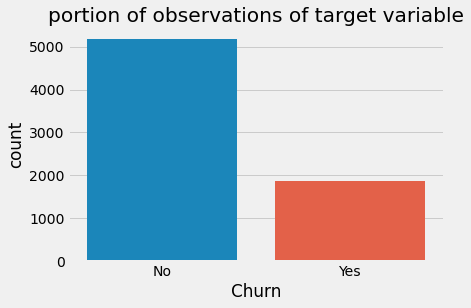

In [8]:
# checking the distribution of each class in target variable i,e balance in the data
plt.figure()
sns.countplot(data['Churn'])
plt.title('portion of observations of target variable')
plt.show()

In [9]:
#checking for percentage distribution of class
data['Churn'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* The data is not balanced ,so the data instances for non churners are high compared to those who have churned
* we should use f1-score(precision, recall) and AUC Score for our model performance evaluation

In [10]:
def percentage_stacked_plot(columns_to_plot, super_title):
    '''To create stacked barplot of categorical features vs Target'''
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(data[column], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="best", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

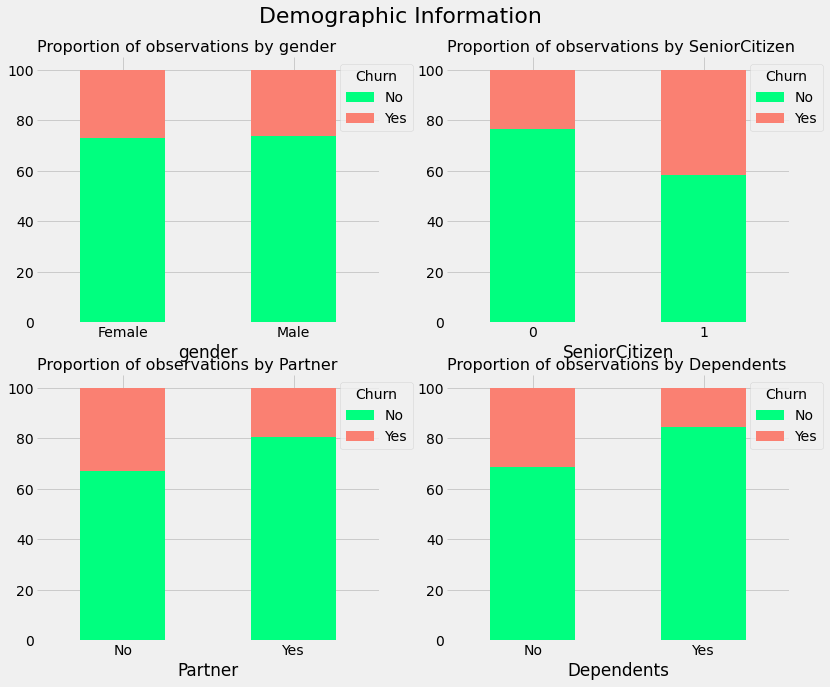

In [11]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

* gender : Not highly significant because both male and female have same percentage of churn

* for senior citizen the churn rate is almost double than the youngsters

* customers with partners has less churn rate compared to without partners

* customers with no dependents have high churn rate


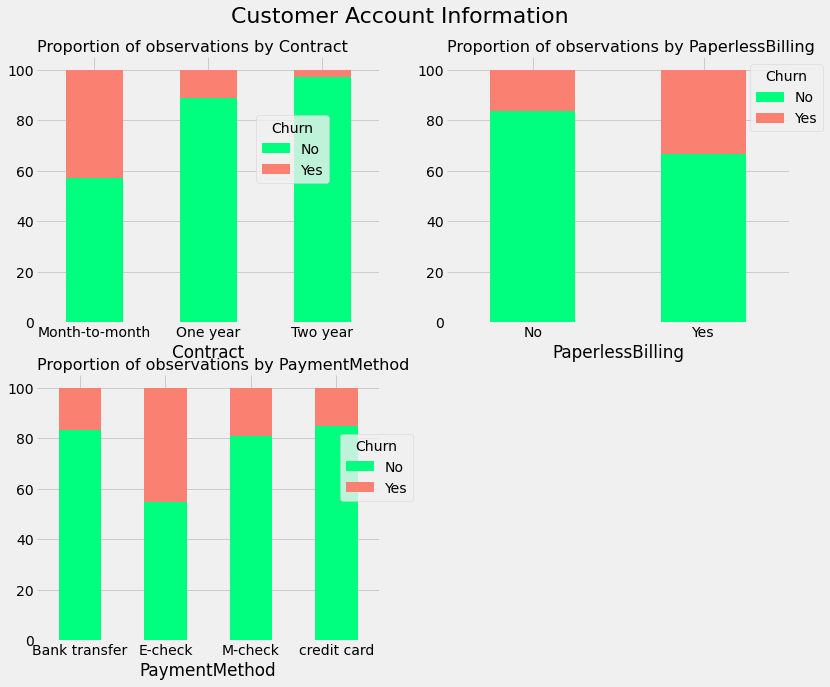

In [12]:
#accounts information
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
percentage_stacked_plot(account_columns, 'Customer Account Information')

* customers with month-to-month contract churn more compared to other contracts

* customers opted for paperlessbilling has high churn rates compared to those who havent opted

* customers opted for electronic check have high churn rates compared to other

Text(0.5, 1.0, 'distribution of tenure by Churn')

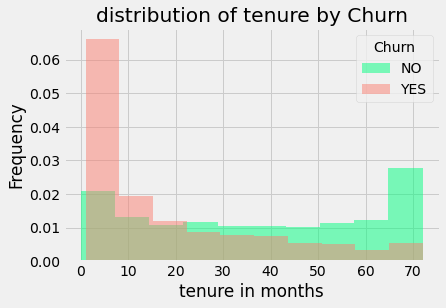

In [13]:
#numerical Features
data['tenure'][data['Churn']=='No'].plot(kind='hist',density=True,alpha=0.5,color='springgreen',label='NO')
data['tenure'][data['Churn']=='Yes'].plot(kind='hist',density=True,alpha=0.5,color='salmon',label='YES')
plt.legend(title='Churn')
plt.xlabel('tenure in months')
plt.title('distribution of tenure by Churn')

* customers with less tenure are more likely to churn

Text(0.5, 1.0, 'distribution of monthly charge by Churn')

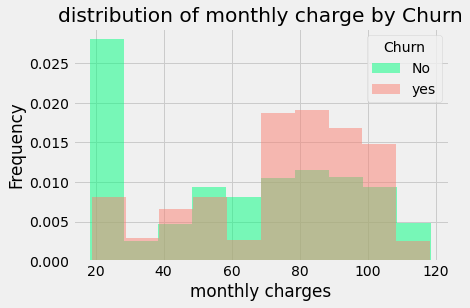

In [14]:
data['MonthlyCharges'][data['Churn']=='No'].plot(kind='hist',alpha=0.5,color='springgreen',label='No',density=True)
data['MonthlyCharges'][data['Churn']=='Yes'].plot(kind='hist',alpha=0.5,color='salmon',label='yes',density=True)
plt.legend(title='Churn')
plt.xlabel('monthly charges')
plt.title('distribution of monthly charge by Churn')

* customers with high monthly charges have high churn rate

Text(0.5, 1.0, 'distribution of Total charges by Churn')

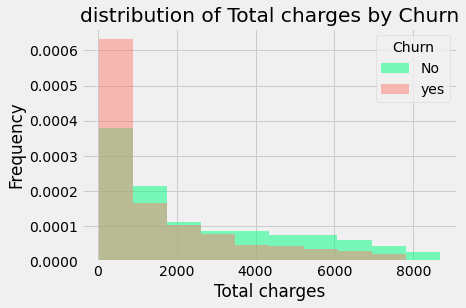

In [15]:
data['TotalCharges'][data['Churn']=='No'].plot(kind='hist',alpha=0.5,color='springgreen',label='No',density=True)
data['TotalCharges'][data['Churn']=='Yes'].plot(kind='hist',alpha=0.5,color='salmon',label='yes',density=True)
plt.legend(title='Churn')
plt.xlabel('Total charges')
plt.title('distribution of Total charges by Churn')

* customers with less total charges have high churn rate whereas customers with high total charges have very low churn rate

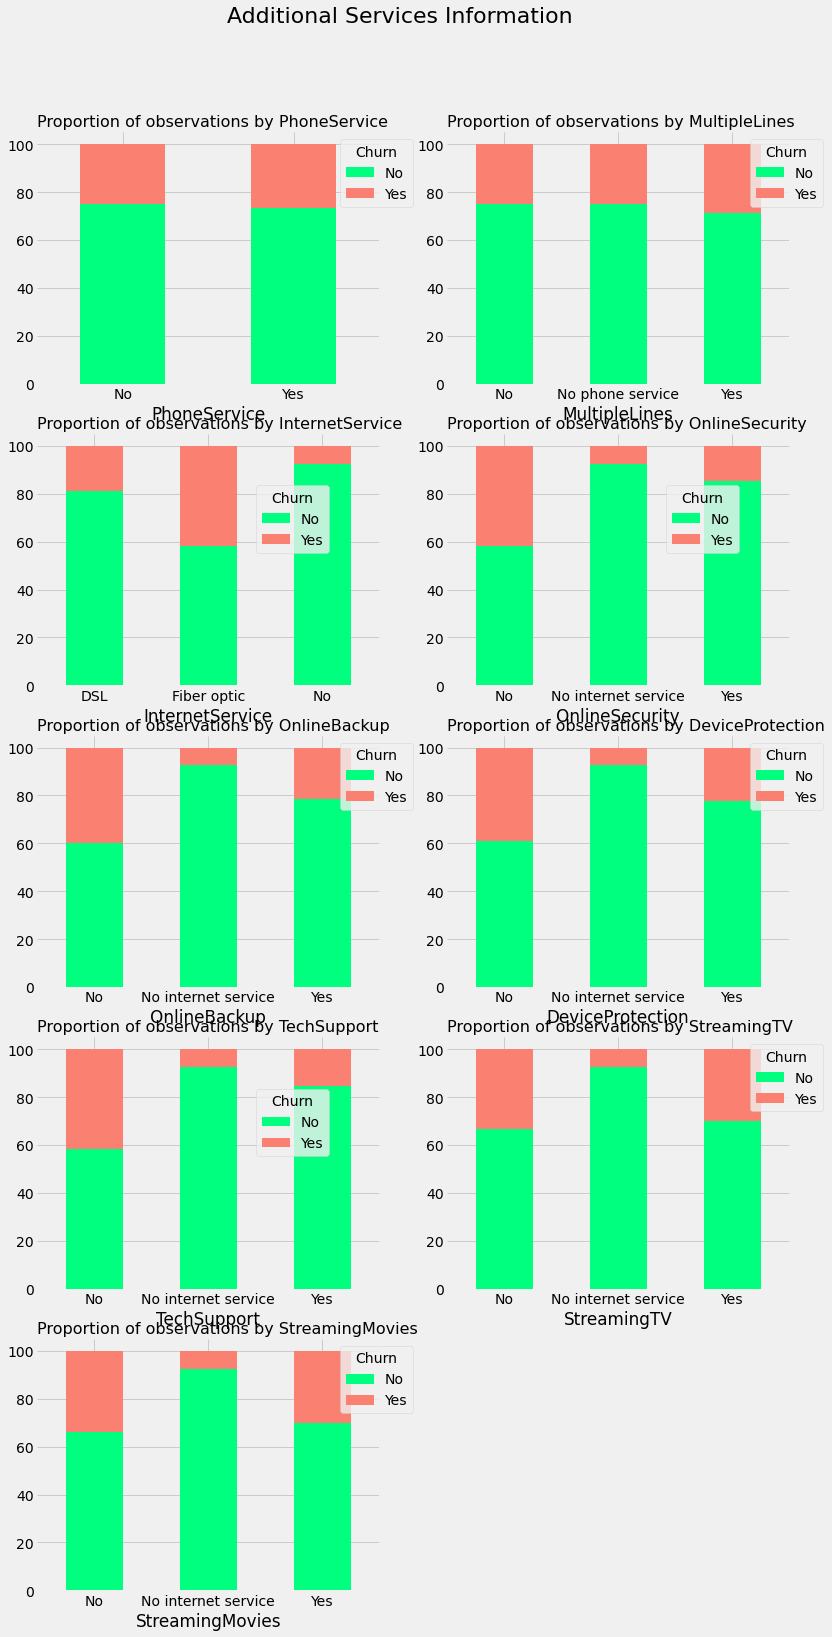

In [16]:
# services columns
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns vs Target
percentage_stacked_plot(services_columns, 'Additional Services Information')

* phoneservice and multiple lines doesnt have significant effect on the churn rate

* customers with fiber optic internet service are more likely to leave the company

* customers with no online security , no online backup ,no device protection and no tech support have high churn rate


* streaming tv and streaming movies doesnt have significant predictive power

<AxesSubplot:xlabel='Additional_serv_consumed', ylabel='count'>

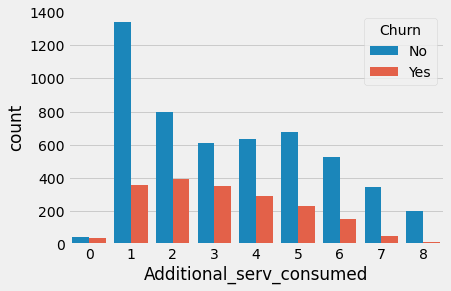

In [17]:
services_data = data.copy()
services_data['Additional_serv_consumed']= (services_data[services_columns] == 'Yes' ).sum(axis=1)
sns.countplot('Additional_serv_consumed',data=services_data,hue='Churn')

* customers with more additional services are less likely to churn

* This supports our previous observation of customers with less total charges churn more because those are the customers who have not opted for additional services

* so from the above analysis we can see that **customerId, gender ,phoneservice, Multiplelines**  are not so important features for our prediction

In [18]:
# verifying important features using mutual_information_score
# this indicate any linear as well as non linear relationships between the features and the target
from sklearn.metrics import mutual_info_score
mi=pd.DataFrame()
feature=[]
m_info=[]
for item in data.select_dtypes('object').drop('Churn',axis=1):
    score= mutual_info_score(data[item],data['Churn'])
    feature.append(item)
    m_info.append(score)
mi['feature']=feature
mi['m_info']=m_info
mi.sort_values(by=['m_info'],ascending=False).set_index('feature')

,m_info
feature,
customerID,0.578599
Contract,0.098453
OnlineSecurity,0.064677
TechSupport,0.063021
InternetService,0.055574
OnlineBackup,0.046792
PaymentMethod,0.044519
DeviceProtection,0.043917
StreamingMovies,0.032001


* we can see gender , multipleLines , phoneservice has not so good relationship with the target variable (almost nearer to 0)
* so we will drop those features

In [19]:
#dropping the columns
df = data.drop(['customerID','gender','PhoneService','MultipleLines'],axis=1)
label_encod_columns = ['Partner','Dependents','PaperlessBilling','Churn']
#label encoding
for column in label_encod_columns:
    df[column]=df[column].map({'Yes':1 ,'No':0 })
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,E-check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,M-check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,M-check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,E-check,70.70,151.65,1


In [20]:
# one-hot-encoding on features with more than two classes
one_hot_encod_columns = ['Contract','TechSupport','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','PaymentMethod']
df=pd.get_dummies(df,columns=one_hot_encod_columns,drop_first=True)

In [21]:
df.shape

(7043, 27)

<AxesSubplot:>

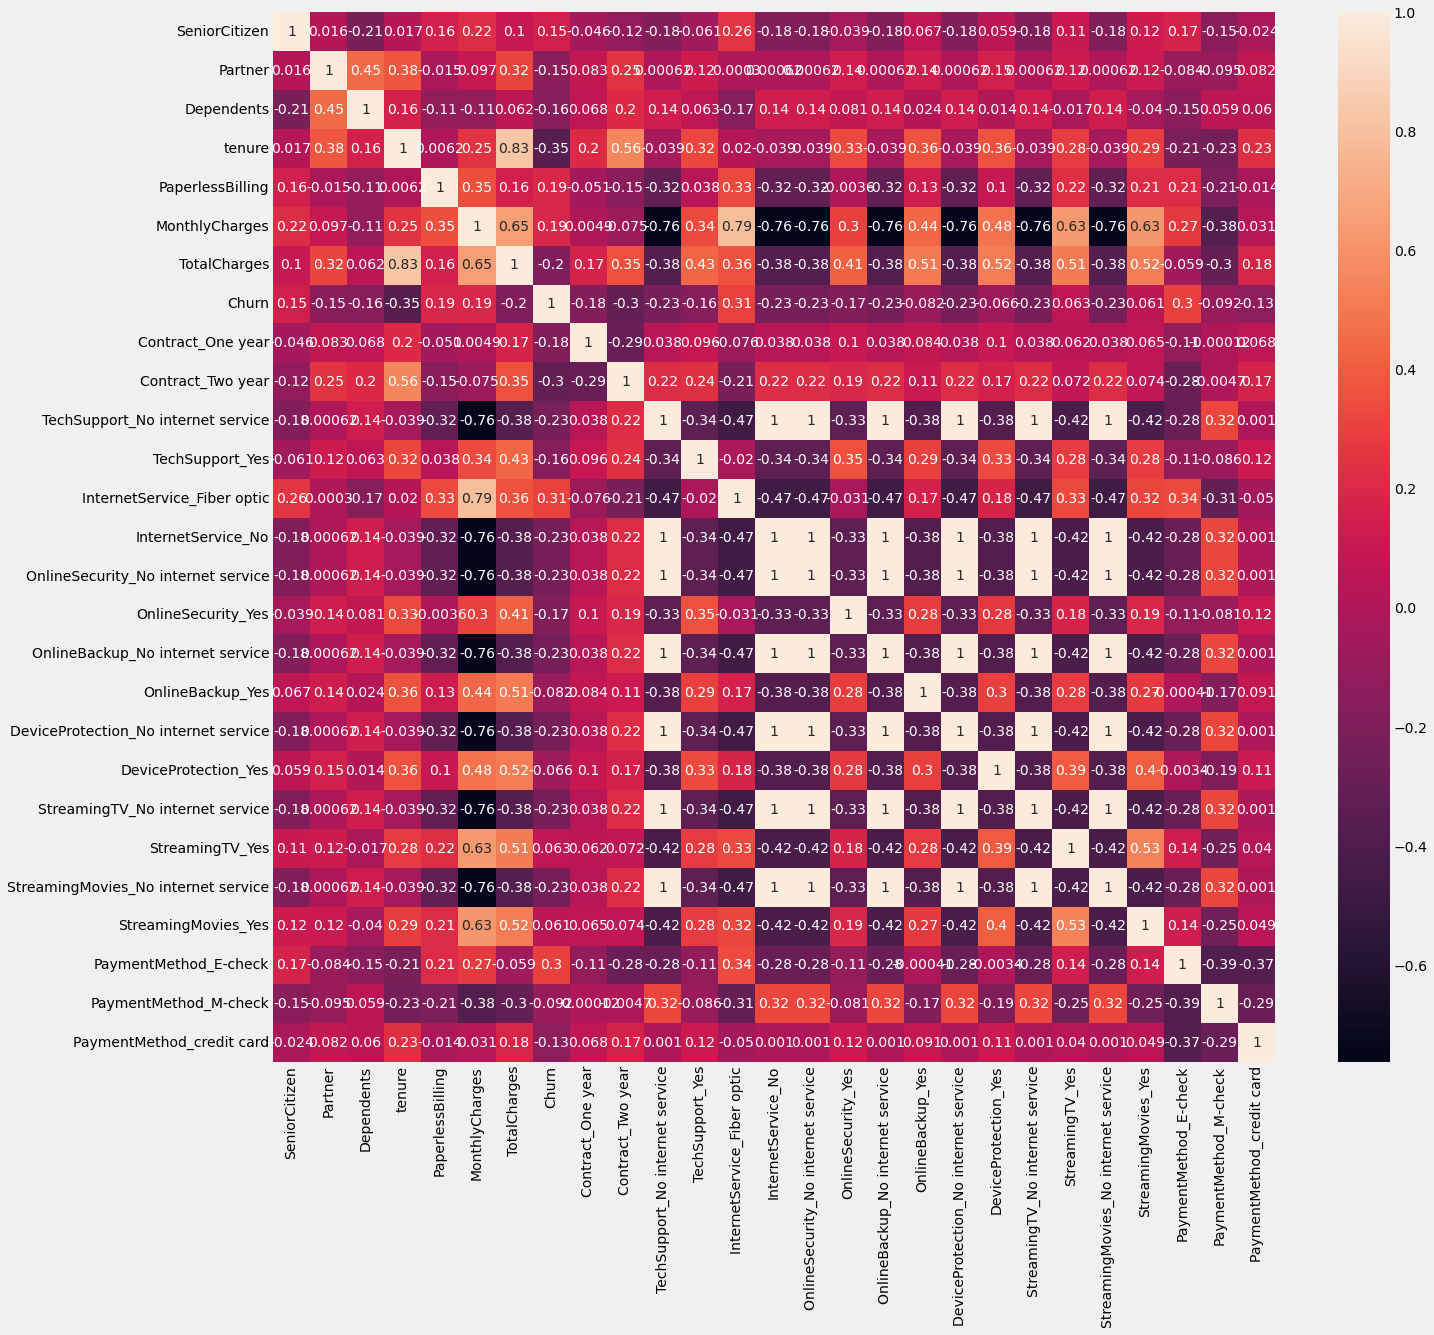

In [26]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)

In [20]:
#feature scaling of numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_columns=['tenure','MonthlyCharges','TotalCharges']
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_E-check,PaymentMethod_M-check,PaymentMethod_credit card
0,0,1,0,0.013889,1,0.115423,0.001275,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0.472222,0,0.385075,0.215867,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0.027778,1,0.354229,0.010310,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0.625000,0,0.239303,0.210241,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0.027778,1,0.521891,0.015330,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#splitting the train-test data
x= df.loc[:,df.columns!='Churn']
y= df['Churn']
x.shape

(7043, 26)

In [22]:
y.shape

(7043,)

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25,random_state=0)
print(x_train.shape ,'\n',y_train.shape,'\n',x_test.shape,'\n',y_test.shape)

(5282, 26) 
 (5282,) 
 (1761, 26) 
 (1761,)


### logistic regression

In [24]:
#creating machine learning model pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

model_pipeline=[]
model_pipeline.append(LogisticRegression())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(GradientBoostingClassifier())


In [25]:
from sklearn.metrics import accuracy_score , f1_score , classification_report , confusion_matrix , auc , roc_curve
model_name=['Log Reg','DecisionTree','Random Forest','SVC','KNN','Naivebayes','GradientBoostingclassifier']
Trainacc=[]
Testacc=[]
Trainf1=[]
Testf1=[]
auc_list=[]
conf_mat=[]
for model in model_pipeline:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    x_pred = model.predict(x_train)
    Trainacc.append(accuracy_score(y_train,x_pred))
    Testacc.append(accuracy_score(y_test,y_pred))
    Trainf1.append(f1_score(y_train,x_pred))
    Testf1.append(f1_score(y_test,y_pred))
    fpr , tpr , thresh = roc_curve(y_test , y_pred)
    auc_list.append(round(auc(fpr,tpr),2))
    conf_mat.append(confusion_matrix(y_test,y_pred))

In [26]:
dict= {'Model':model_name , 'TrainAcc':Trainacc,'Testacc':Testacc,'Trainf1': Trainf1,'Testf1':Testf1,'AUC':auc_list}
results = pd.DataFrame(dict)
results.set_index('Model',inplace=True)
results

,TrainAcc,Testacc,Trainf1,Testf1,AUC
Model,,,,,
Log Reg,0.806891,0.797274,0.604957,0.578512,0.71
DecisionTree,0.996782,0.732538,0.993926,0.498403,0.66
Random Forest,0.996782,0.778535,0.993948,0.534606,0.68
SVC,0.813328,0.788189,0.603060,0.541205,0.69
KNN,0.839833,0.745599,0.682909,0.501114,0.66
Naivebayes,0.675502,0.673481,0.586789,0.579371,0.73
GradientBoostingclassifier,0.828474,0.788756,0.641614,0.555024,0.70


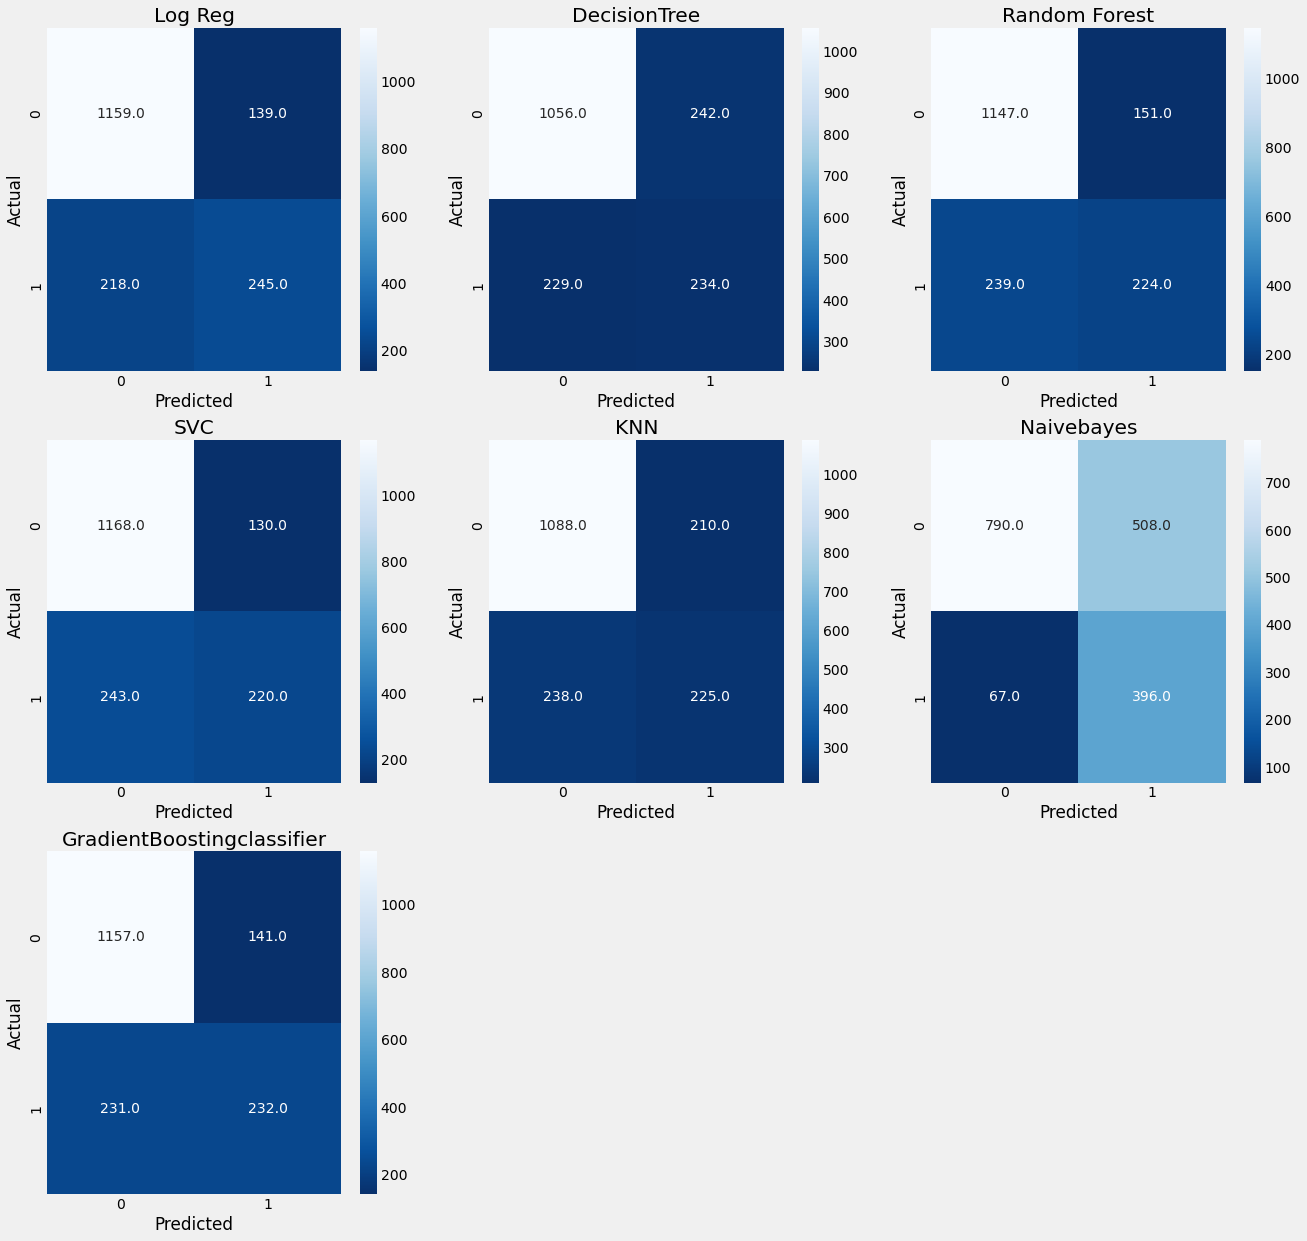

In [29]:
fig = plt.figure(figsize=(20,20))
for i in range(len(conf_mat)):
    sub = fig.add_subplot(3,3,i+1).set_title(model_name[i])
    cm_plot = sns.heatmap(conf_mat[i],annot=True,cmap='Blues_r',fmt='.1f')
    cm_plot.set_xlabel('Predicted')
    cm_plot.set_ylabel('Actual')

#### RandomForest Model with hyperparameter tuning using RandomSearchCV

In [44]:
#creating a function to evaluate metrics
from sklearn.metrics import  roc_auc_score
def metrics(model,testdata,actual,predicted):
    print('f1-score:',f1_score(actual,predicted))
    probpred = model.predict_proba(testdata)
    print('AUC Score',roc_auc_score(actual,probpred[:,1]))
    print('Classification Report \n',classification_report(actual,predicted))
    
    fpr , tpr ,thresh = roc_curve(actual,probpred[:,1],pos_label=1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(actual,predicted),annot=True,fmt='.1f')
    plt.title('Confusion matrix')
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,linestyle='--',color='r')
    plt.title('ROC Curve')

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[int(x) for x in range(200,2000,100)],
         'bootstrap':['True','False'],
         'max_features':['auto','sqrt'],
         'max_depth':[int(x) for x in range(10,100,10)],
         'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4],'criterion':['entropy','gini']}
classifier = RandomForestClassifier()
randcv = RandomizedSearchCV(classifier , params , n_jobs=-1,verbose=2,random_state=42,n_iter=300)
modelrf = randcv.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [31]:
randcv.best_params_

{'n_estimators': 1300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': 'True'}

In [34]:
y_pred2 = modelrf.predict(x_test)

f1-score: 0.5635491606714629
AUC Score 0.8332889609201063
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.90      0.86      1298
           1       0.63      0.51      0.56       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.79      1761



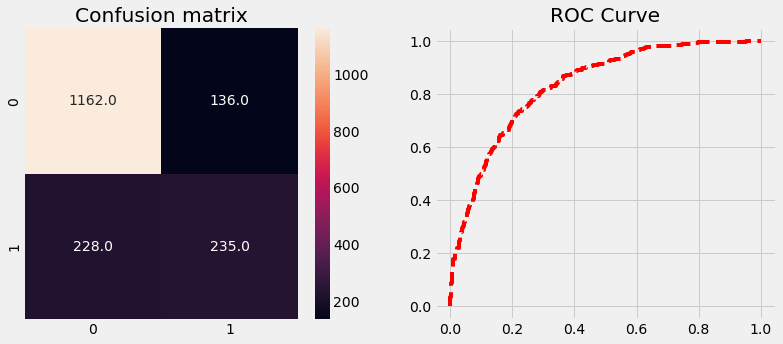

In [45]:
metrics(modelrf,x_test,y_test,y_pred2)

In [48]:
data['Churn'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [105]:
weights = {0:0.40,1:0.75}

f1-score: 0.6287878787878788
AUC Score 0.8292105814893823
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1298
           1       0.56      0.72      0.63       463

    accuracy                           0.78      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.78      0.79      1761



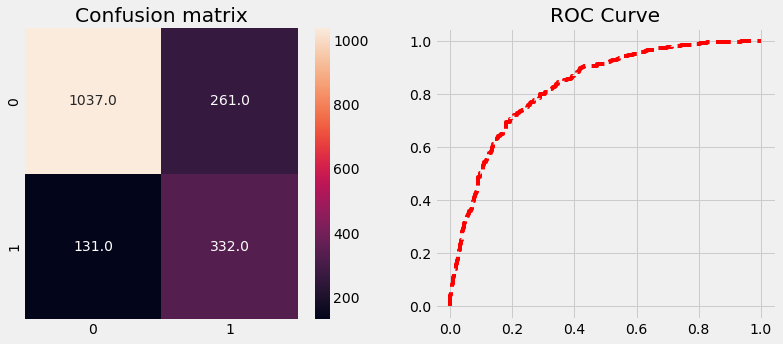

In [109]:
logreg =LogisticRegression(class_weight=weights,C=1)
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
metrics(logreg,x_test,y_test,pred)

#### KNN Algorithm
* Tuning the KNN algorithm

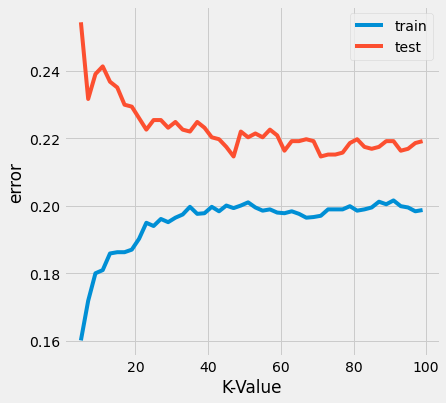

In [113]:
error1=[]
error2=[]
for i in range(5,100,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    x_pred = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    error1.append(np.mean(y_train != x_pred))
    error2.append(np.mean(y_test != y_pred))
    
plt.figure(figsize=(6,6))
plt.plot(range(5,100,2),error1,label="train")
plt.plot(range(5,100,2),error2,label="test")
plt.xlabel("K-Value")
plt.ylabel('error')
plt.legend()

f1-score: 0.5711086226203808
AUC Score 0.8156151514042205
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1298
           1       0.59      0.55      0.57       463

    accuracy                           0.78      1761
   macro avg       0.72      0.71      0.71      1761
weighted avg       0.78      0.78      0.78      1761



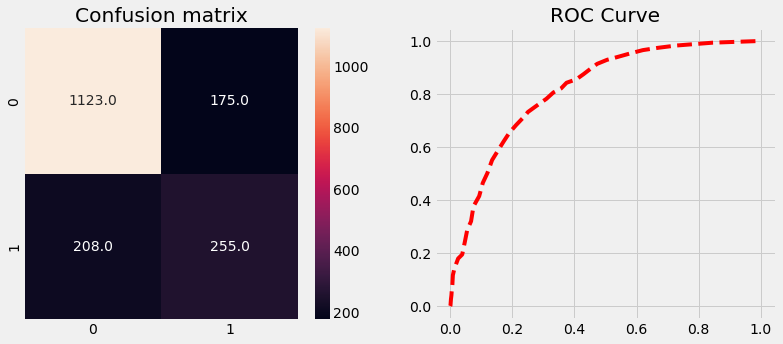

In [114]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
metrics(knn,x_test,y_test,prediction)

In [137]:
clfr = SVC()
params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['poly']}
grid = RandomizedSearchCV(clfr ,params ,n_jobs=-1,n_iter=10,verbose=5)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['poly']},
                   verbose=5)

In [138]:
grid.best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 0.1}

f1-score: 0.5282167042889391
AUC Score 0.762470589409858
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1298
           1       0.55      0.51      0.53       463

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.68      1761
weighted avg       0.76      0.76      0.76      1761



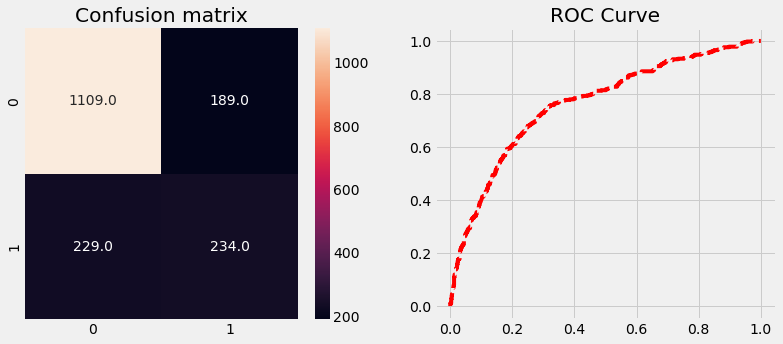

In [141]:
svm = SVC(kernel='poly',gamma=1,C=0.1,probability=True)
svm.fit(x_train,y_train)
prediction = svm.predict(x_test)
metrics(svm,x_test,y_test,prediction)

f1-score: 0.558858501783591
AUC Score 0.8296590201905574
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.62      0.51      0.56       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



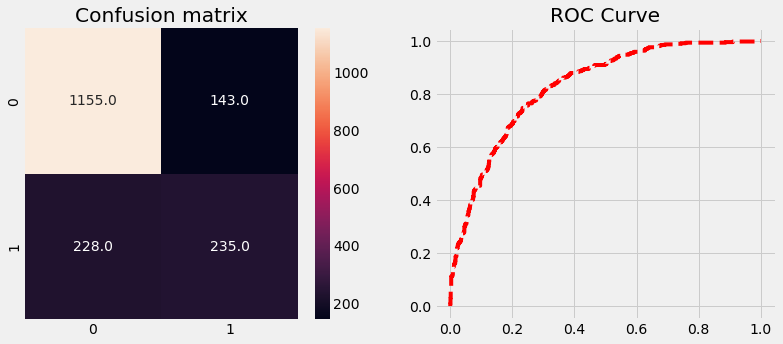

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gb.fit(x_train , y_train)
gb_y_pred=gb.predict(x_test)
metrics(gb,x_test,y_test,gb_y_pred)

* from all the above models we can see that **PRECISION and RECALL** for the **majority class** in the data is higher and the model is not performing well on the minority class

* this is the clear problem of **CLASS IMBALANCE** in the data

* so in order to compensate for this class imbalance we will perform **synthetic minority oversampling technique (SMOTE)**

In [144]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x,y)
print('original dataset shape:',y_smote.value_counts())

original dataset shape: 0    5174
1    5174
Name: Churn, dtype: int64


In [145]:
x_train , x_test, y_train , y_test = train_test_split(x_smote,y_smote , test_size=0.25,random_state=42)

##### LOGISTIC REGRESSION MODEL AFTER OVERSAMPLING

In [151]:
predy = grid.predict(x_test_s)
predx = grid.predict(x_train_s)
print('train accuracy score:',accuracy_score(y_train_s,predx))
print('test accuracy score:',accuracy_score(y_test_s, predy))

train accuracy score: 0.8524674655327922
test accuracy score: 0.7889447236180904


#### GradientBoostingClassifier

#### XGBoost classifier

In [156]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train_s,y_train_s)
predy = xgbc.predict(x_test_s)
predx = xgbc.predict(x_train_s)
print('train accuracy score:',accuracy_score(y_train_s,predx))
print('test accuracy score:',accuracy_score(y_test_s, predy))

[22:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy score: 0.9350599149594124
test accuracy score: 0.8268264398917665
